## 映画レビューのデータセットを使って練習

1. 映画数の年推移
2. revenueの年推移をplotしてみよう

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('archive/tmdb_5000_movies.csv')
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


## 映画数の年推移

In [6]:
release_date_sample = df['release_date'].iloc[0]
release_date_sample

'2009-12-10'

In [9]:
release_date_sample[:4]

'2009'

In [15]:
df = df[~df['release_date'].isna()]

In [30]:
def get_year(release_date):

    return int(release_date[:4])

In [31]:
# エラーメッセージ
# np.nanはfloat扱い
# --> release_dateにNaNが含まれている？
df['release_year'] = df['release_date'].apply(get_year)

# lambda関数を使うなら
# df['release_year'] = df['release_date'].apply(lambda release_date: release_date[:4])

In [32]:
count = df.groupby('release_year').count()['id']

Text(0, 0.5, 'count')

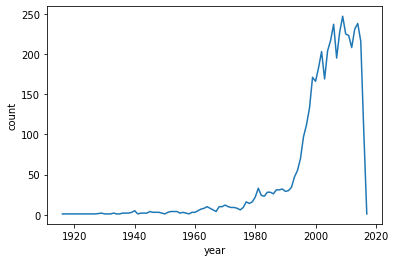

In [34]:
plt.plot(count)
plt.xlabel('year')
plt.ylabel('count')

## revenueの年推移

In [36]:
# revenueの0のやつは除く
df = df[df['revenue'] != 0]
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,release_year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007


In [42]:
plt.plot(df.groupby('release_year').median()['revenue'], label='median')
plt.plot(df.groupby('release_year').mean()['revenue'], label='mean')
plt.plot(df.groupby('release_year')['revenue'].max(), label='max')

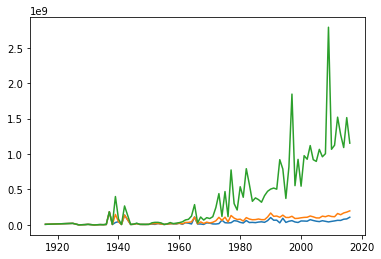

In [43]:
plt.plot(median, label='median')
plt.plot(mean, label='mean')
plt.plot(max, label='max')